Problem Set 1: http://cs229.stanford.edu/ps/ps1/ps1.pdf
# 4. Linear invariance of optimization algorithms

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# read training data
train_df = pd.read_csv('http://cs229.stanford.edu/ps/ps1/quasar_train.csv', dtype=np.float32)
print(train_df.shape)
train_df.head()

(200, 450)


,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [7]:
train_df.describe()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.437280,0.832350,0.998720,1.087760,0.810820,0.888475,0.702390,1.024510,1.134610,0.922155,...,1.157225,1.174780,1.184900,1.172655,1.176870,1.132060,1.148390,1.147795,0.839805,0.512090
std,0.550454,0.851339,1.331848,1.185321,1.150744,1.115849,1.099269,0.972242,0.852812,1.029427,...,0.508772,0.546219,0.507259,0.553776,0.482319,0.563073,0.551507,0.525677,0.607804,0.562989
min,-0.952000,-1.304000,-1.938000,-2.852000,-1.853000,-2.167000,-2.775000,-2.553000,-0.955000,-1.543000,...,-0.418000,-0.353000,-0.011000,-0.824000,0.007000,-0.798000,-0.311000,-0.096000,-1.334000,-1.051000
25%,0.009250,0.252500,0.043750,0.267500,0.080250,0.116500,0.091500,0.414750,0.479750,0.222750,...,0.835250,0.868500,0.812000,0.818500,0.841750,0.732750,0.824750,0.801250,0.463250,0.166000
50%,0.430500,0.848000,0.889500,0.908000,0.802000,0.877000,0.749000,1.021000,1.119000,0.942500,...,1.180500,1.132000,1.208000,1.225000,1.162500,1.143500,1.141000,1.146000,0.800500,0.489500
75%,0.819750,1.450750,1.832750,1.918750,1.428750,1.653000,1.459250,1.634500,1.631000,1.505750,...,1.469750,1.502500,1.543500,1.538000,1.528500,1.522250,1.531750,1.499000,1.227000,0.874250
max,2.035000,3.289000,5.700000,4.132000,4.229000,4.476000,3.241000,3.782000,3.249000,4.384000,...,2.455000,2.685000,2.552000,2.616000,2.298000,2.560000,2.702000,2.643000,2.936000,2.092000


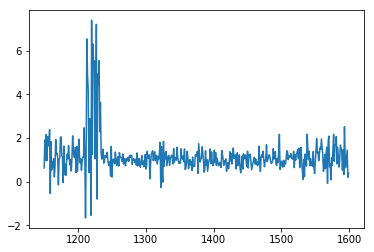

In [11]:
plt.plot(train_df.loc[0])

In [8]:
# read test data
test_df = pd.read_csv('http://cs229.stanford.edu/ps/ps1/quasar_test.csv', dtype=np.float32)
print(test_df.shape)
test_df.head()

(50, 450)


,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00,1159.00,...,1590.00,1591.00,1592.00,1593.00,1594.00,1595.00,1596.00,1597.00,1598.00,1599.00
0,0.025,1.460,-0.057,1.37,2.090,1.150,-0.182,0.351,1.57,1.970,...,0.525,0.574,1.570,1.280,0.963,1.04,1.160,0.555,0.733,1.180
1,1.210,0.375,0.695,-0.09,0.275,-0.128,0.043,-0.054,1.40,1.950,...,0.658,0.579,1.670,1.230,1.230,1.19,1.220,0.932,1.280,0.338
2,1.380,-0.436,2.700,1.18,1.850,0.374,2.290,1.110,1.06,1.270,...,0.672,0.483,1.350,1.450,2.810,1.28,0.893,1.980,0.744,0.610
3,0.427,0.509,1.060,0.80,0.537,0.288,2.790,2.120,1.51,-0.937,...,0.928,1.020,0.462,1.040,1.070,1.64,1.250,0.706,0.673,1.480
4,-0.371,0.773,-0.621,1.84,0.284,-0.009,1.910,1.900,1.64,0.803,...,1.240,0.867,1.460,0.035,1.880,1.74,-0.225,0.711,-0.571,0.786


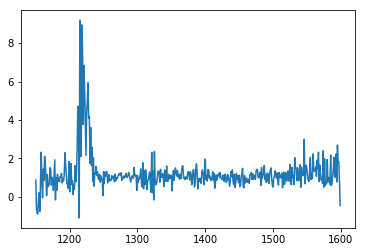

In [12]:
plt.plot(test_df.loc[49])

## 5.a.i.

$$
\begin{align}
J(\theta) &= (X\theta - \vec{y})^T W (X\theta - \vec{y}) \\
&= \sum_{ij}^{m} W_{ij} (X\theta - \vec{y})_{i} (X\theta - \vec{y})_{j} \\ 
&= \sum_{ij}^{m} W_{ij} (\theta^T x^{(i)} - y^{(i)}) (\theta^T x^{(j)} - y^{(j)}) \\ 
\end{align}
$$

if $W$ is diagonal, elements of $J(\theta)$ become 0 except those that are at $i = j$.

so,
$$
\begin{align}
J(\theta) &= \sum_{i}^{m} W_{ii} (\theta^T x^{(i)} - y^{(i)})^2 \\ 
\end{align}
$$

$$W_{ii} = \frac{1}{2}w_{i}$$

## 5.a.ii.

$$
\begin{align}
\nabla_{\theta} J(\theta)
&= 2 (W (X\theta - \vec{y}))^T X \\
\end{align}
$$

let $\nabla_{\theta} J(\theta) = 0$,

$$
\begin{align}
   2 (W (X\theta - \vec{y}))^T X &= 0 \\
   X^T(W (X\theta - \vec{y})) &= 0 \\
   X^T W X\theta - X^T W \vec{y} &= 0 \\
   X^T W X\theta &= X^T W \vec{y} \\
   \theta &= (X^T W X)^{-1} X^T W \vec{y}
\end{align}
$$

when $W = I$,

$$\theta = (X^T X)^{-1} X^T \vec{y}$$

## 5.a.iii.